Name -- Tharundi P.D.
Index -- 190626H

[]

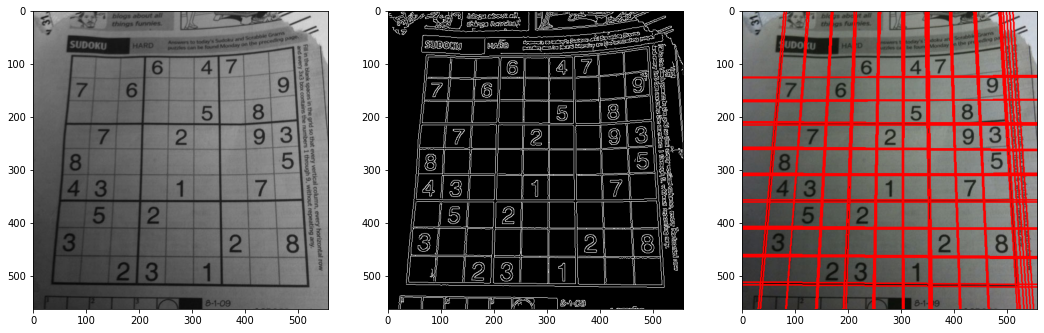

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
im = cv.imread(r'sudoku.png', cv.IMREAD_COLOR)
assert im is not None

gray = cv.cvtColor(im, cv.COLOR_RGB2GRAY)
edges = cv.Canny(gray, 10, 100, apertureSize=3)
lines = cv.HoughLines(edges, 1, 0.5*np.pi/180, 200)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0, y0 = a*rho, b*rho
    x1, y1 = int(x0+1000*(-b)), int(y0+1000*(a))
    x2, y2 = int(x0-1000*(-b)), int(y0-1000*(a))
    cv.line(im, (x1,y1), (x2,y2), (0,0,255), 2)
gray = cv.cvtColor(gray, cv.COLOR_BGR2RGB)
edges = cv.cvtColor(edges, cv.COLOR_BGR2RGB)
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,3,figsize=(18,6))
ax[2].imshow(im)
ax[0].imshow(gray)
ax[1].imshow(edges)
plt.plot()

[]

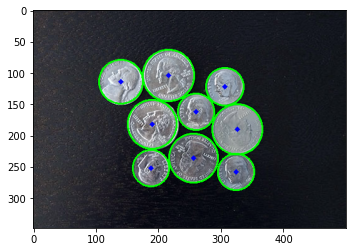

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
im = cv.imread(r'coins.jpg', cv.IMREAD_COLOR)
assert im is not None
gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, 50, param1=155, param2=30, minRadius=18, maxRadius=42)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv.circle(im,(i[0],i[1]), i[2],(0,255,0),2)
    cv.circle(im,(i[0],i[1]), 2,(0,0,255),3)
plt.imshow(im)
plt.plot()

x = 29.0, y = 109.0, scale = 1.0, orientation = 0.0, p1 = (4, 76) , p2 = (54, 141)


[]

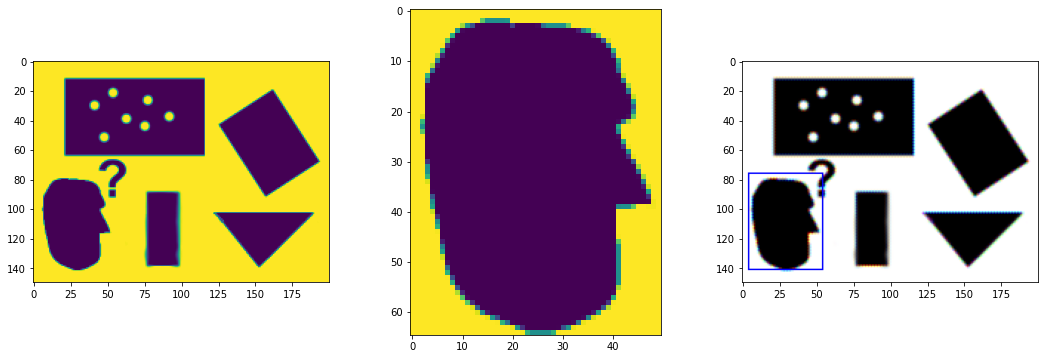

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread(r'pic1.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None
templ = cv.imread(r'templ.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert templ is not None
im_edges = cv.Canny(im,50,250)
templ_edges = cv.Canny(templ, 50, 250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(templ_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions, votes = alg.detect(im_edges)

out = cv.cvtColor(im, cv.COLOR_BAYER_BG2BGR)
for x, y, scale, orientation in positions[0]:
    halfHe = templ.shape[0]/2.*scale
    halfWi = templ.shape[1]/2.*scale
    p1 = (int(x-halfWi), int(y-halfHe))
    p2 = (int(x+halfWi), int(y+halfHe))
    print("x = {}, y = {}, scale = {}, orientation = {}, p1 = {} , p2 = {}".format(x,y, scale, orientation, p1, p2))
    cv.rectangle(out, p1, p2, (0,0,255))
fig, ax = plt.subplots(1,3,figsize=(18,6))
ax[0].imshow(im)
ax[1].imshow(templ)
ax[2].imshow(out)
plt.plot()

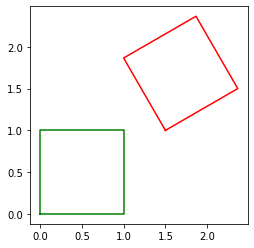

In [5]:
import matplotlib.pyplot as plt
import numpy as np

a, b, c, d = [0,0,1],[0,1,1],[1,1,1],[1,0,1] #four coners of squre
X = np.array([a,b,c,d]).T

theta = np.pi*30/180
s = 1
tx, ty = 1.5, 1
H = np.array([[s*np.cos(theta), -s*np.sin(theta), tx], [s*np.sin(theta), s*np.cos(theta), ty], [0, 0, 1]])
Y = H @ X

x = np.append(X[0,:],X[0,0])
y = np.append(X[1,:],X[1,0])

fig, ax = plt.subplots(1, 1)

ax.plot(x,y,color='g')
ax.set_aspect('equal')

x = np.append(Y[0,:],Y[0,0])
y = np.append(Y[1,:],Y[1,0])

ax.plot(x, y, color='r')
ax.set_aspect('equal')
plt.show()

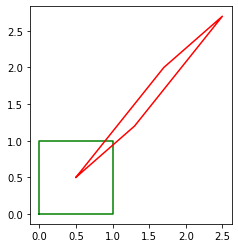

In [6]:
import matplotlib.pyplot as plt
import numpy as np

a, b, c, d = [0,0,1],[0,1,1],[1,1,1],[1,0,1] #four coners of squre
X = np.array([a,b,c,d]).T

theta = np.pi*30/180
s = 1
tx, ty = 0.5 , 0.5

a11, a12, a21, a22 = 0.8, 1.2, 0.7, 1.5  #must form a non singular matrix
A = np.array([[a11, a12, tx], [a21, a22, ty], [0, 0, 1]])
Y = A @ X

x = np.append(X[0,:],X[0,0])
y = np.append(X[1,:],X[1,0])

fig, ax = plt.subplots(1, 1)

ax.plot(x,y,color='g')
ax.set_aspect('equal')

x = np.append(Y[0,:],Y[0,0])
y = np.append(Y[1,:],Y[1,0])

ax.plot(x, y, color='r')
ax.set_aspect('equal')
plt.show()

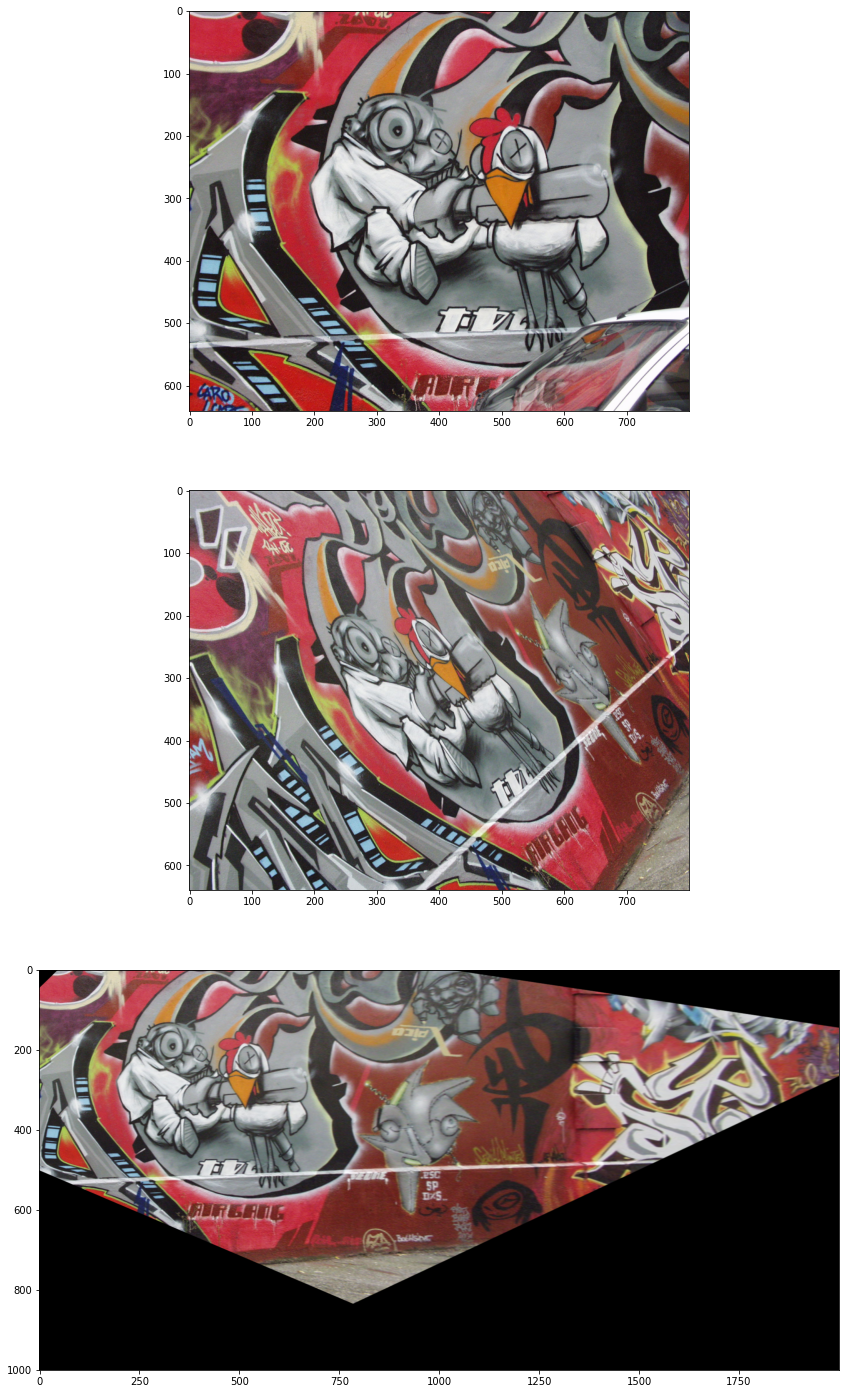

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im1 = cv.imread(r'img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread(r'img4.ppm', cv.IMREAD_ANYCOLOR)


H = np.array([ [6.6378505e-01, 6.8003334e-01, -3.1230335e+01],
              [-1.4495500e-01,  9.7128304e-01, 1.4877420e+02],
              [4.2518504e-04, -1.3930359e-05, 1.0000000e+00]])
im1to4 = cv.warpPerspective(im4, np.linalg.inv(H), (2000, 2000))

im1= cv.cvtColor(im1, cv.COLOR_BGR2RGB)
im4= cv.cvtColor(im4, cv.COLOR_BGR2RGB)
im1to4= cv.cvtColor(im1to4, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(3, 1, figsize=(25, 25))

ax[0].imshow(im1)
ax[1].imshow(im4)
ax[2].imshow(im1to4)
ax[2].set_ylim([1000, 0])
ax[2].set_aspect('equal')

plt.show()